## Analysis of superstore sales

### Problem Statement

- From 2014 to 2017, a multinational retail company saw strong sales, but their recorded profits did not match the rising volume of sales they experienced throughout that time. The campaign titled "Operation Increase Sales and Profit" (OISP)" was introduced as part of the company's initiative to keep growing its sales while maximising those revenues to the fullest.

Before the company's management team can make any practical decisions on the campaign, a Data Analyst is needed to analyse the dataset containing their four-year daily sales records in order to derive insights from their "sitting" data.


### My Task


-To analyse the given data and advise management on what to do to increase sales and profit as intended in the compaign by outlaying the analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data. 


-Submit statistical summaries of the key variables considering the aim of the campaign to management including visualizations and a report on my findings.

**Powerpoint or any other presentation application can be used for the presentation.**

 STEP 1: IMPORT NECESSARY MODULES

Why is it crucial when working on a project to import specific modules?
- Importing modules is comparable to lighting a fire. Everything you need to start a fire, including wood, paper, and other materials, is present except for the facilitator, which in this example is a lit match or lighter.
- You are unable to read a CSV file from your desktop without first importing the necessary module. You cannot plot a graph without importing a module that enables you to do so.

- The subsequent line of code imports the required modules.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 10)

### STEP 2: DATA CLEANING


- Because data tells tales, it is crucial to ensure that it is clean before any analysis is done. Garbage in, garbage out, as the saying goes. Six phases of data cleansing were taken.



Step 2.1 is reading the data. It is simpler if you make sure the data is in your current working directory.



In [2]:
#load the dataset
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### STEP 2.2 How big is the dataset?

In [3]:
df.shape
print('The number of rows is {} and number columns in the dataframe is {}'.format(df.shape[0],df.shape[1]))

The number of rows is 9994 and number columns in the dataframe is 13


#### STEP 2.3 Is the dataset's column heading information clear and descriptive?
- This is significant since, in the event that another person or people work with your data, it will be simple for them to comprehend and evaluate the context of each column. 



In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

- It is obvious that several of the labels in the line of code above had white spaces, and one column titled "Sales" was renamed to "Discounted Sales" after it was realised that the Sales column represented sales made after applying discounts to each item sold.



In [5]:
df.columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'SubCategory', 'DiscountedSales', 'Quantity', 'Discount',
       'Profit']

- The country code was eliminated because it appeared repeatedly. The line of code following makes this correction.


In [6]:
df.drop(['Country'], inplace = True, axis = 1)

- In the line of code below, which appears under the datatype of each column, general information from the dataset was retrieved. When closely scrutinised, it becomes clear that some column datatypes are incorrect. Later on, after doing the analysis, this was fixed.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Mode        9994 non-null   object 
 1   Segment          9994 non-null   object 
 2   City             9994 non-null   object 
 3   State            9994 non-null   object 
 4   Postal Code      9994 non-null   int64  
 5   Region           9994 non-null   object 
 6   Category         9994 non-null   object 
 7   SubCategory      9994 non-null   object 
 8   DiscountedSales  9994 non-null   float64
 9   Quantity         9994 non-null   int64  
 10  Discount         9994 non-null   float64
 11  Profit           9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB


#### STEP 2.4 Check for duplicates in the dataset and remove them

In [8]:
duplicates = df.duplicated(keep = False)
duplicates.sum()

34

In [9]:
# Sort your duplicated sales to see duplicated values
duplicated_sales = df[duplicates].sort_values('Region')
duplicated_sales

,Ship Mode,Segment,City,State,Postal Code,Region,Category,SubCategory,DiscountedSales,Quantity,Discount,Profit
5372,Standard Class,Corporate,Houston,Texas,77041,Central,Office Supplies,Paper,15.552,3,0.2,5.4432
9262,Standard Class,Consumer,Detroit,Michigan,48227,Central,Furniture,Chairs,389.970,3,0.0,35.0973
8533,Standard Class,Consumer,Detroit,Michigan,48227,Central,Furniture,Chairs,389.970,3,0.0,35.0973
8457,Second Class,Corporate,Chicago,Illinois,60653,Central,Office Supplies,Binders,3.564,3,0.8,-6.2370
8032,First Class,Consumer,Houston,Texas,77041,Central,Office Supplies,Paper,47.952,3,0.2,16.1838
...,...,...,...,...,...,...,...,...,...,...,...,...
4117,Standard Class,Consumer,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3670,Standard Class,Consumer,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
3412,Standard Class,Corporate,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6357,Standard Class,Corporate,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [10]:
df.drop_duplicates(keep = 'first',ignore_index = True,inplace=True)
df.duplicated(keep = False).unique() #code to confirm that the found duplicates have been dropped
df.duplicated().sum() #code to confirm that the duplcates have been dropped

0

In [12]:
df.shape #Confrmation of dropped duplicates through the checking of total number of columns have reduced by 1

(9977, 12)

#### Step 2.5: Thoroughly cleaning each column in the dataset. 
Do you recall how some of the column datatypes were found to be incorrect during a previous exploration of the dataset? 


The following lines of code are going to fix this.


- **Column 1 - Ship Mode**

In [13]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [14]:
df['Ship Mode'] = df['Ship Mode'].astype('category')    # Changing to datatype to category
df['Ship Mode'].dtype

CategoricalDtype(categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False)

In [15]:
df['Ship Mode'].describe()   #summary statistcs of the Ship Mode Column

count               9977
unique                 4
top       Standard Class
freq                5955
Name: Ship Mode, dtype: object

- **Column 2 - Segment**

In [16]:
df['Segment'].describe()    #checking summary statistics of the Segment column

count         9977
unique           3
top       Consumer
freq          5183
Name: Segment, dtype: object

In [17]:
df['Segment'] = df['Segment'].astype('category')  #changing the datatype of the segment column from object to category dtype
df['Segment'].dtype

CategoricalDtype(categories=['Consumer', 'Corporate', 'Home Office'], ordered=False)

- **Column 3 - City**

In [18]:
df['City'].describe()      #checking summary statistics of the City column

count              9977
unique              531
top       New York City
freq                914
Name: City, dtype: object

- **Column 4 - City**

In [19]:
df['State'].describe()     #checking summary statistics of the State column    

count           9977
unique            49
top       California
freq            1996
Name: State, dtype: object

- **Column 5 - Postal Code**

In [20]:
df['Postal Code'] = df['Postal Code'].astype('str')   # Changing PostalCode from int to str
df['Postal Code'].describe()       #checking summary statistics of the PostalCode column

count      9977
unique      631
top       10035
freq        263
Name: Postal Code, dtype: object

- **Column 6 - Region**

In [21]:
df['Region'].describe()        #checking summary statistics of the Region column    

count     9977
unique       4
top       West
freq      3193
Name: Region, dtype: object

- **Column 7 - Category**

In [22]:
df['Category'].describe()  #checking summary statistics of the Category column

count                9977
unique                  3
top       Office Supplies
freq                 6012
Name: Category, dtype: object

In [23]:
df['Category'] = df['Category'].astype('category')  #change datatype of Category column to category datatype
df['Category']

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9972          Furniture
9973          Furniture
9974         Technology
9975    Office Supplies
9976    Office Supplies
Name: Category, Length: 9977, dtype: category
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']

- **Column 7 - SubCategory**

In [24]:
df['SubCategory'].describe()      #checking summary statistics of the SubCategory column

count        9977
unique         17
top       Binders
freq         1522
Name: SubCategory, dtype: object

In [25]:
df['SubCategory'] = df['SubCategory'].astype('category')   #change dataype of SubCategory Column
df['SubCategory']

0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9972    Furnishings
9973    Furnishings
9974         Phones
9975          Paper
9976     Appliances
Name: SubCategory, Length: 9977, dtype: category
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage', 'Supplies', 'Tables']

- **Column 8 - DiscountedSales**

In [26]:
df['DiscountedSales'].describe()  #summary statistics of DiscountedSales Column

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: DiscountedSales, dtype: float64

- **Column 9 - Quantity**

In [27]:
df['Quantity'].describe()        #summary statistics of Quantity Column

count    9977.000000
mean        3.790719
std         2.226657
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

- **Column 10 - Discount**

In [28]:
df['Discount'].describe()       #summary statistics of DiscountAmount Column

count    9977.000000
mean        0.156278
std         0.206455
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

- **Column 11 - Profit**

In [29]:
df['Profit'].describe()             #summary statistics of Profit Column

count    9977.00000
mean       28.69013
std       234.45784
min     -6599.97800
25%         1.72620
50%         8.67100
75%        29.37200
max      8399.97600
Name: Profit, dtype: float64

#### STEP 2.6 - Checking summary statistics of numerical columns in the dataset

In [30]:
df.describe()

,DiscountedSales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


#### STEP 2.7 Checking summary statistics of non-numerical columns in the dataset

In [31]:
df.describe(include = np.object)

,City,State,Postal Code,Region
count,9977,9977,9977,9977
unique,531,49,631,4
top,New York City,California,10035,West
freq,914,1996,263,3193


#### STEP 2.8  Adding New Columns To the Dataset 
- New columns were added to the dataset in order to easy analyze the data in the dataset.

- Calculating the original sales without discounts and adding it to the dataset as a new column

In [32]:
original_sales = (1/(1-df['Discount']))*df['DiscountedSales']
original_sales

0        261.96
1        731.94
2         14.62
3       1741.05
4         27.96
         ...   
9972      31.56
9973      91.96
9974     323.22
9975      29.60
9976     243.16
Length: 9977, dtype: float64

In [33]:
df['OriginalSales'] = original_sales

- Calculating Unit Price of each product and adding it to the dataset as a new column

In [34]:
df['UnitPrice'] = original_sales/df['Quantity']
df['UnitPrice']

0       130.98
1       243.98
2         7.31
3       348.21
4        13.98
         ...  
9972     10.52
9973     45.98
9974    161.61
9975      7.40
9976    121.58
Name: UnitPrice, Length: 9977, dtype: float64

- Calculating Cost Price of each product and adding it to the dataset as a new column

In [35]:
df_cost_price = df['DiscountedSales'] - df['Profit']
df_cost_price

0        220.0464
1        512.3580
2          7.7486
3       1340.6085
4         19.8516
          ...    
9972      21.1452
9973      76.3268
9974     239.1828
9975      16.2800
9976     170.2120
Length: 9977, dtype: float64

In [36]:
df['CostPrice'] = df_cost_price

- Calculating Discounted Amount of each product and adding it to the dataset as a new column

In [37]:
df['DiscountedAmount'] = df['OriginalSales'] - df['DiscountedSales']

- Calculating Profit Percentage of each product and adding it to the dataset as a new column

In [38]:
df['Profit%']=(df['Profit']/df['CostPrice'])*100

### STEP 3: EXPLORATORY DATA ANALYSIS

- The main goal of exploratory data analysis is to assist in the analysis of the data before drawing any conclusions. It can help with the identification of glaring mistakes, the comprehension of data patterns, the detection of outliers or unexpected occurrences, and the identification of significant relationships between variables.
- The lines of code below were used to create the visualisations that follow.


**HEATMAP FOR CORRELATION**

This method of data visualisation uses colour to depict a phenomenon's size in two dimensions. The link is stronger for colours that are darker and weaker for colours that are lighter. 


In [39]:
heatmap = df[['CostPrice', 'UnitPrice' ,'Quantity', 'OriginalSales', 'Profit', 'Discount' , 'DiscountedAmount',
              'DiscountedSales']]
heatmap.head()

,CostPrice,UnitPrice,Quantity,OriginalSales,Profit,Discount,DiscountedAmount,DiscountedSales
0,220.0464,130.98,2,261.96,41.9136,0.00,0.0000,261.9600
1,512.3580,243.98,3,731.94,219.5820,0.00,0.0000,731.9400
2,7.7486,7.31,2,14.62,6.8714,0.00,0.0000,14.6200
3,1340.6085,348.21,5,1741.05,-383.0310,0.45,783.4725,957.5775
4,19.8516,13.98,2,27.96,2.5164,0.20,5.5920,22.3680


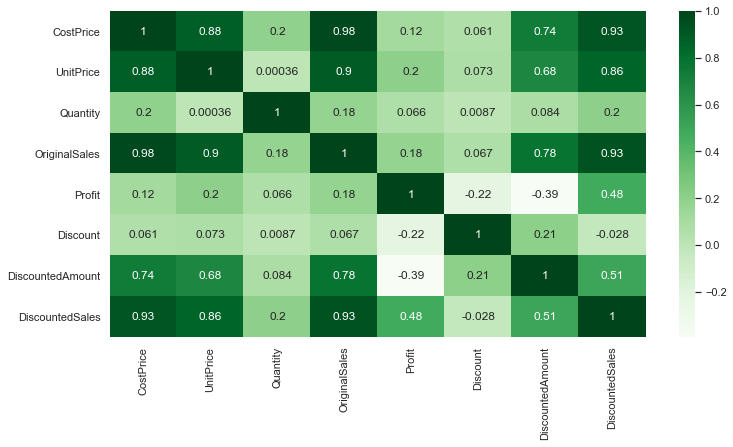

In [40]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = heatmap.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'Greens')

**NUMERICAL DISTRIBUTION OF COLUMNS**

- A distribution network's coverage of each product or reference can be measured using the percentage of numeric distribution of columns. 

- This indicator is crucial for assessing a product's sales potential and predicting future sales.


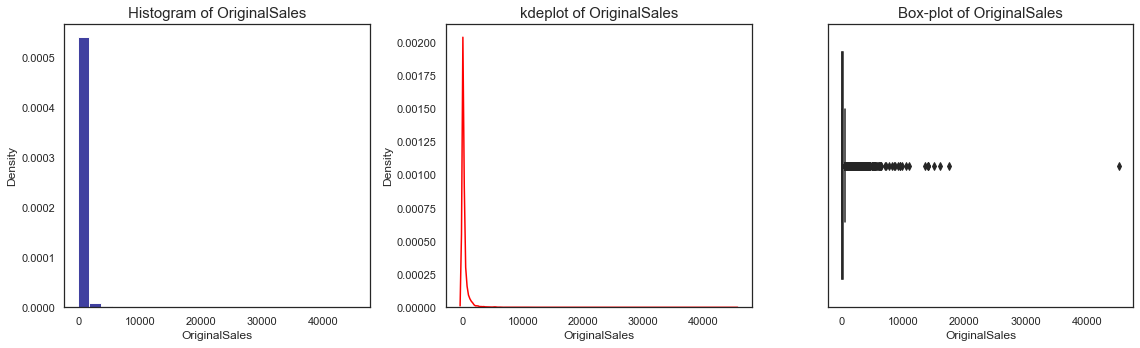

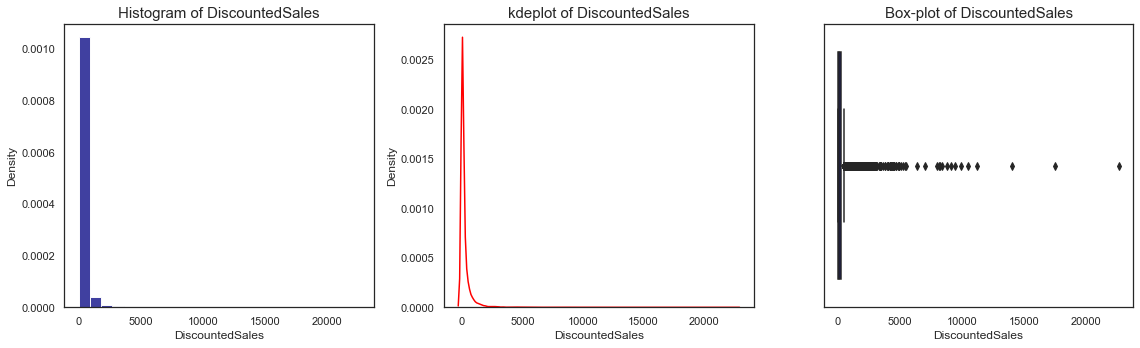

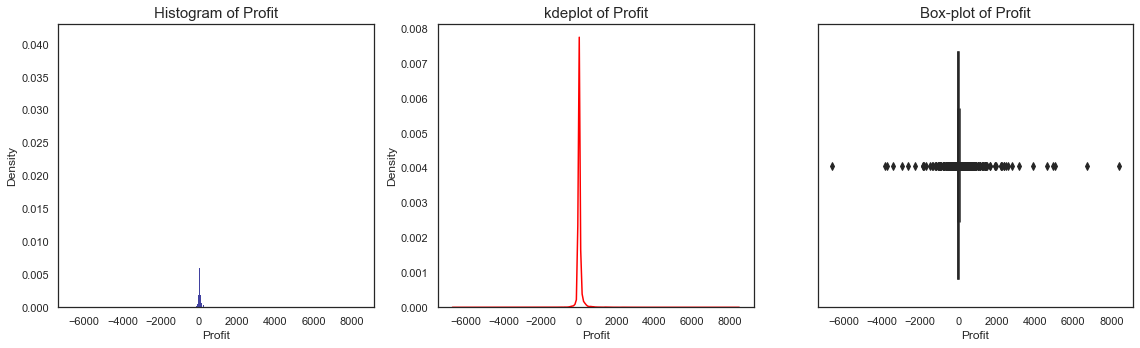

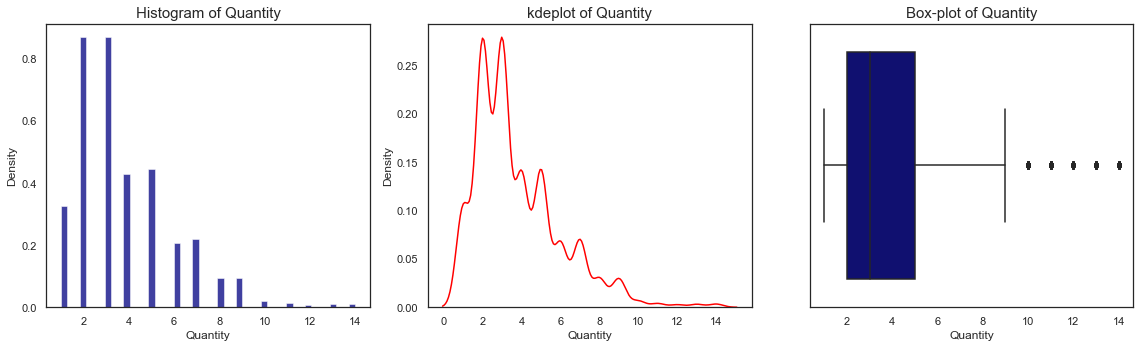

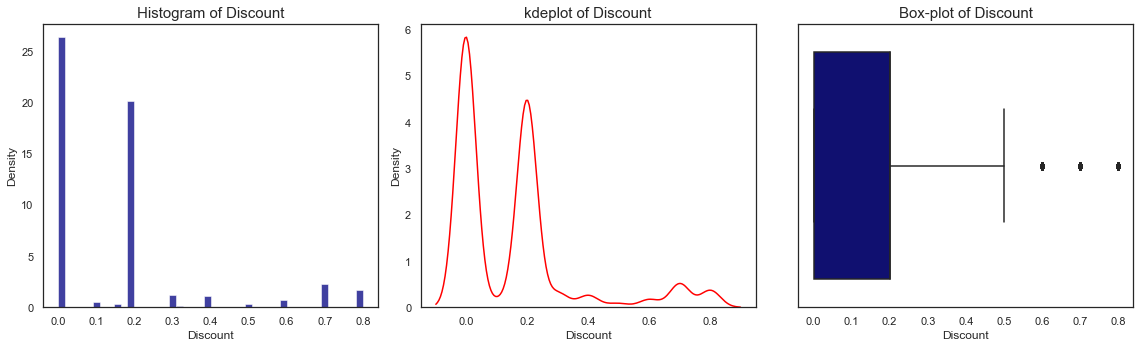

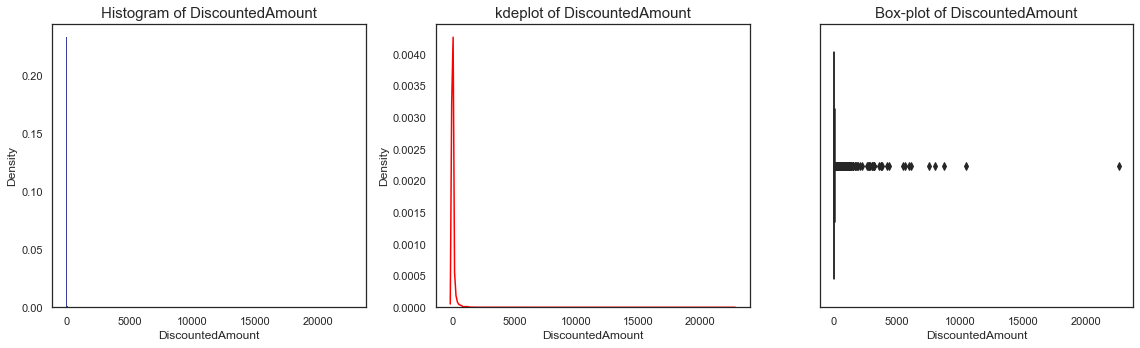

In [41]:
imp_numerical_cols= df[['OriginalSales','DiscountedSales','Profit','Quantity','Discount', 'DiscountedAmount']]
for i,col in enumerate(imp_numerical_cols):
    plt.figure(figsize=(16,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.kdeplot(data = df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)
    
    plt.subplot(1,3,3)
    sns.boxplot(data = df,x=col,color='navy')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

The numerical distribution of a particular column in the line of code immediately above led to the following conclusions: The distribution of original sales and discounted sales is incredibly right-skewed.
- The profit distribution is normally distributed and has a very low standard deviation.  
- There are several outliers on the right side of the distribution of quantity sold, which is right biassed. 
- There are multiple models used in the Distribution of Discount.


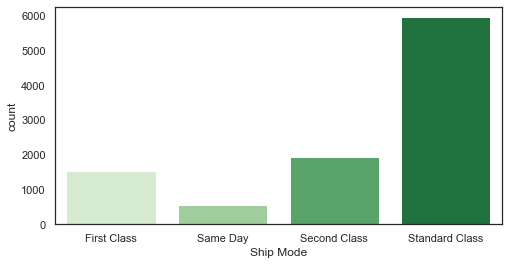

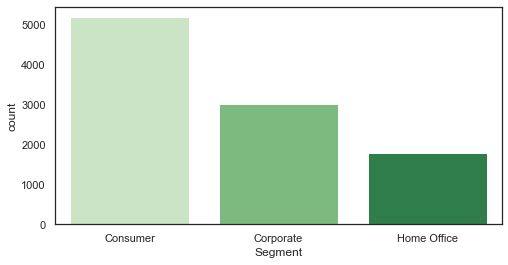

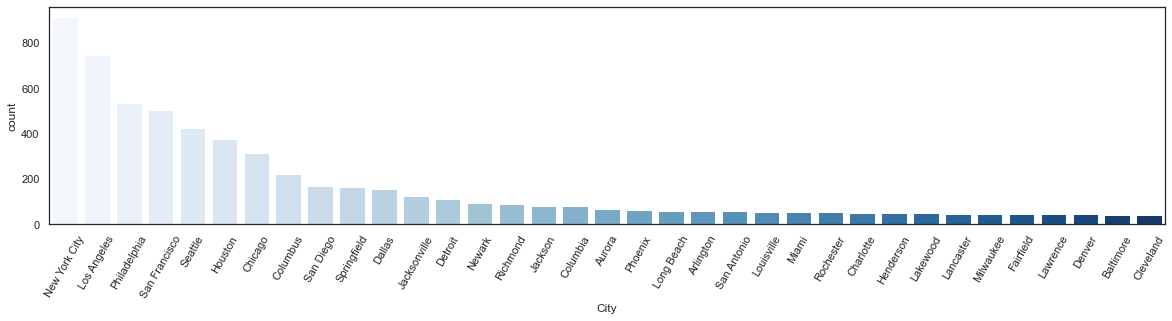

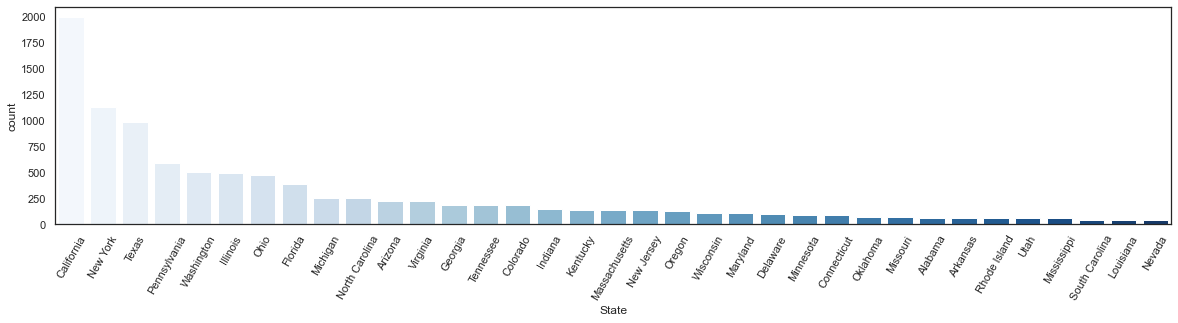

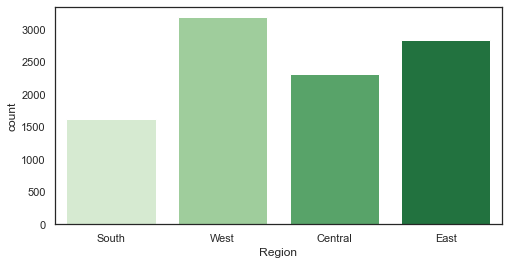

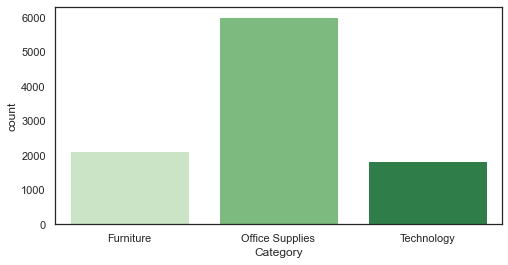

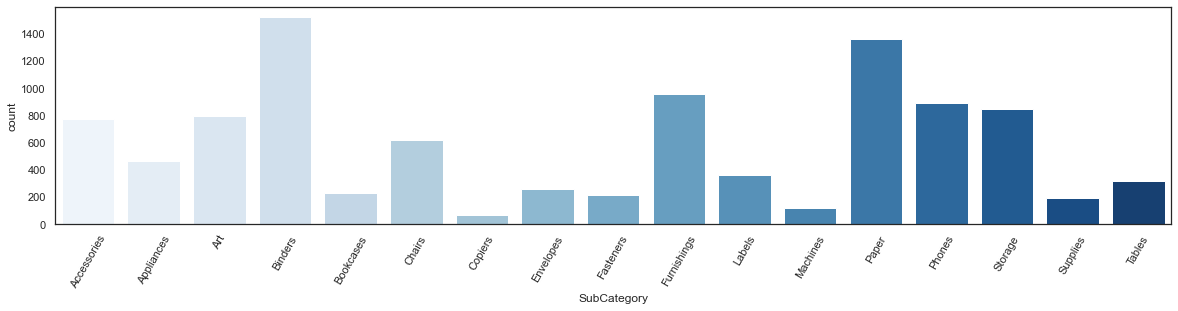

In [42]:
imp_categotical_features=df[['Ship Mode','Segment', 'City', 'State','Region','Category', 'SubCategory']]

for col in imp_categotical_features:
    width=8
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,4))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)   
    else:
        plt.figure(figsize=(width,4))
        sns.countplot(data=df,x=col,palette='Greens')
    plt.show()

**COUNT OF SUB-CATEGORY**

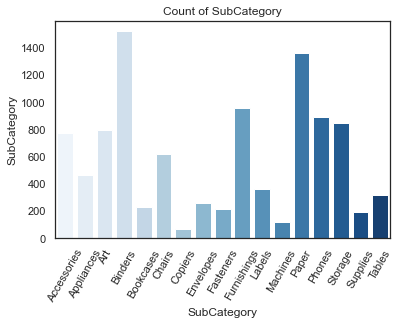

In [43]:
sns.countplot(x='SubCategory', data = df)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
plt.xticks(rotation=60)
plt.title('Count of SubCategory')
plt.show()

The majority of clients favour the Standard Class Shipment option, according to the above observation from the analysis of general exploratory data.
- The Consumer segment accounts for the majority of the clientele.
- Los Angeles and New York City are the two cities where the most purchases have been made.
- New California reports the highest number of purchases, followed by New York, among all the states.
- As opposed to South and Central, the East and West see the majority of acquisitions.
- Office supplies are the most often purchased category.
- In terms of Product Sub-Category, Binders and Paper are in the lead.



**SALES AND PROFIT ANALYSIS**

In [44]:
sales_profit_segment1 = df.groupby('Segment').sum()[['DiscountedSales','Profit']]
sales_profit_segment1 = sales_profit_segment1.reset_index()
sales_profit_segment1

,Segment,DiscountedSales,Profit
0,Consumer,1.160833e+06,134007.4413
1,Corporate,7.060701e+05,91954.9798
2,Home Office,4.292927e+05,60279.0015


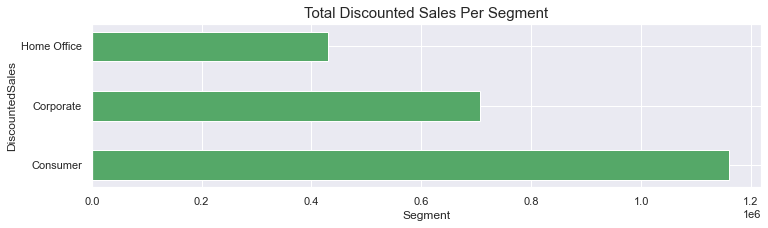

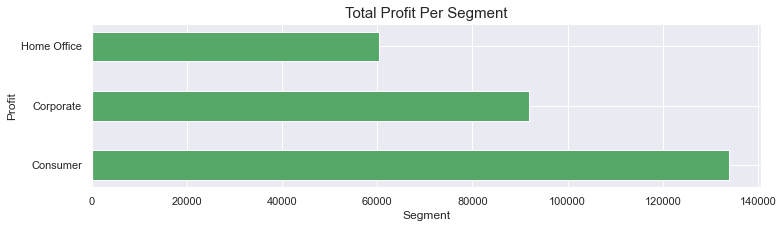

In [45]:
plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment1['Segment'],sales_profit_segment1['DiscountedSales'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Discounted Sales Per Segment',fontdict={'fontsize':15})
plt.ylabel('DiscountedSales')
plt.xlabel('Segment')
plt.show()

plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment1['Segment'],sales_profit_segment1['Profit'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Profit Per Segment',fontdict={'fontsize':15})
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.show()

- It is clear from the aforementioned graphs that the consumer category is performing admirably in terms of profit and reduced sales, whereas the home office segment is underwhelming in both categories.
- Please note that the total amount of discounted sales and profit for each sector are the basis for this graphic.



In [46]:
sales_profit_segment = df.groupby('Segment').mean()[['DiscountedSales','Profit']]
sales_profit_segment = sales_profit_segment.reset_index()
sales_profit_segment

,Segment,DiscountedSales,Profit
0,Consumer,223.969279,25.855188
1,Corporate,234.185781,30.499164
2,Home Office,241.311234,33.883643


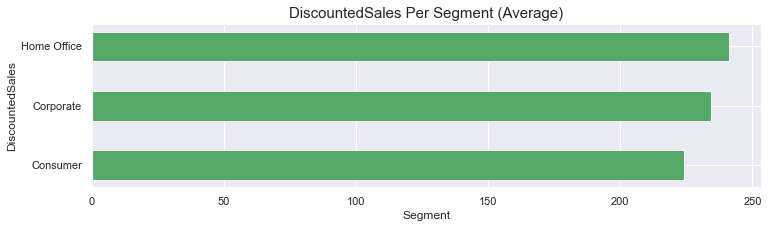

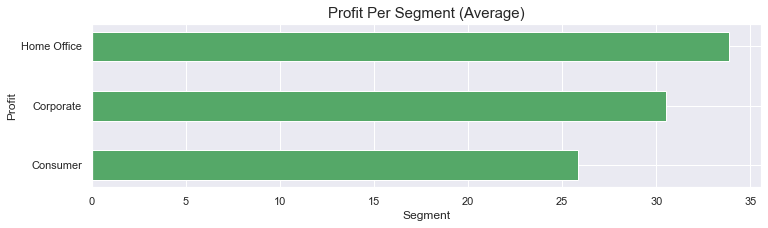

In [47]:
plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment['Segment'],sales_profit_segment['DiscountedSales'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('DiscountedSales Per Segment (Average)',fontdict={'fontsize':15})
plt.ylabel('DiscountedSales')
plt.xlabel('Segment')
plt.show()

plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment['Segment'],sales_profit_segment['Profit'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Profit Per Segment (Average)',fontdict={'fontsize':15})
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.show()


In contrast, the consumer segment is performing poorly in terms of profit and discounted sales, while the home office segment is the best-performing in terms of profit and discounted sales, as can be seen from the graphs in the first few lines of code.
- Please note that the average amount of reduced sales and profit for each sector is used to create this chart.


It is important to note that basing your research on the total discounted sales or profit would produce false results given the obvious contrasts of the graphs' results based on adjustments like the "total" and "average" of the segments.
- This is due to the fact that the total accounts for each and every transaction made, whereas the average does so while holding all other factors constant.


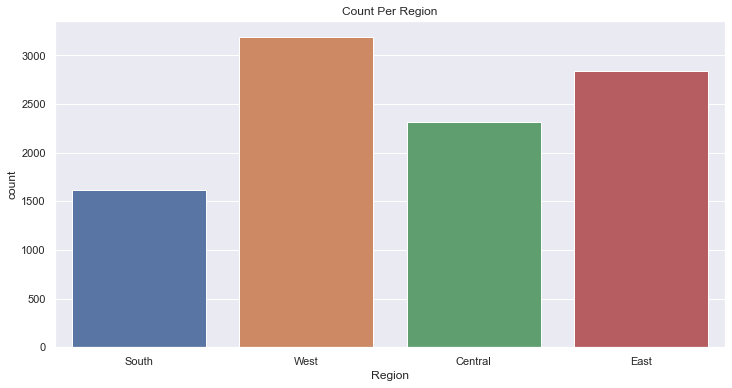

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='Region', data = df)
plt.xticks(rotation = 0)
plt.title('Count Per Region')
plt.show()

**BEST SELLING AND MOST PROFITABLE CATEGORY**

In [49]:
df1_sum = pd.DataFrame(df.groupby(['Category'])[['DiscountedSales', 'Profit', 'Quantity']].sum())
df1_sum

,DiscountedSales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


In [50]:
df1_avg = pd.DataFrame(df.groupby(['Category'])[['DiscountedSales', 'Profit', 'Quantity']].mean())
df1_avg

,DiscountedSales,Profit,Quantity
Category,,,
Furniture,350.002981,8.697740,3.786591
Office Supplies,119.550107,20.353403,3.802562
Technology,452.709276,78.752002,3.756903


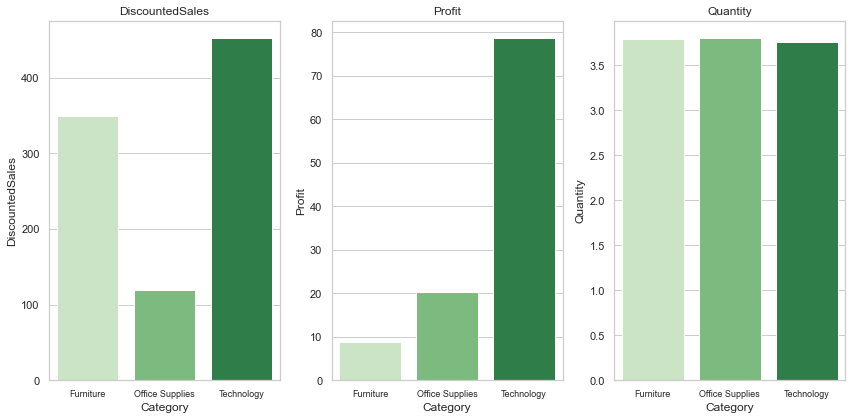

In [51]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 6))
# Plot barplots
cat1 = sns.barplot(x = df1_avg.index, y = df1_avg.DiscountedSales, ax=axis[0], palette = "Greens")
cat2 = sns.barplot(x = df1_avg.index, y = df1_avg.Profit, ax=axis[1], palette = "Greens")
cat3 = sns.barplot(x = df1_avg.index, y = df1_avg.Quantity, ax=axis[2], palette = "Greens")
# Set titles
cat1.set(title = 'DiscountedSales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'horizontal', size = 9)
# Set spacing between subplots
figure.tight_layout()

The Technology category has the largest sale and also drives the most sales to the superstore, even if the amounts of all the categories are about the same as indicated in the image on the far right.

- The next thing we notice is that, while having the second-best sales after technology, the furniture sector has the lowest profitability.

- Office Supplies, which is the category with the lowest sales, is really the second-best performing category in terms of profit.

- In the end, it will be vital to use these insights to make data-driven decisions.


**MOST PROFITABLE CATEGORY**

In [52]:
df2_avg = pd.DataFrame(df.groupby(['SubCategory'])[['DiscountedSales', 'Profit']].mean())

# Sort by descending order according to sales
sub_df2 = pd.DataFrame(df2_avg.sort_values('DiscountedSales', ascending = False))
sub_df2 = sub_df2.reset_index()
sub_df2.head(5)

,SubCategory,DiscountedSales,Profit
0,Copiers,2198.941618,817.909190
1,Machines,1645.553313,29.432669
2,Tables,648.794771,-55.565771
3,Chairs,532.971969,43.198582
4,Bookcases,503.859633,-15.230509


In [53]:
 # Sort by descending order according to profit
sub_profit_df2 = pd.DataFrame(sub_df2.sort_values('Profit', ascending = False))
sub_profit_df2 = sub_profit_df2.reset_index()
sub_profit_df2.head(5)

,index,SubCategory,DiscountedSales,Profit
0,0,Copiers,2198.941618,817.909190
1,9,Accessories,215.974604,54.111788
2,5,Phones,371.211534,50.073938
3,3,Chairs,532.971969,43.198582
4,8,Appliances,230.755710,38.922758


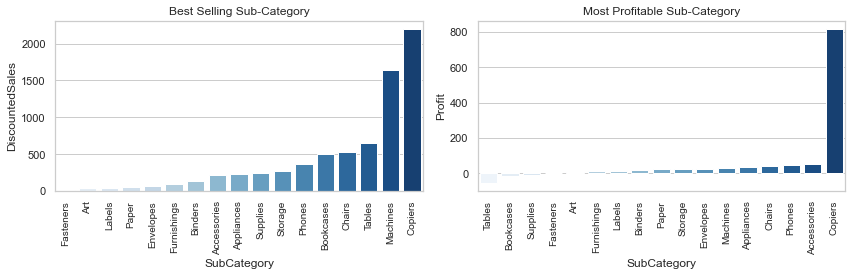

In [54]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 4))
subcat1 = sns.barplot(data = sub_df2, x = sub_df2.SubCategory, y = sub_df2.DiscountedSales, ax=axis[0], palette = "Blues",
                      order=sub_df2.sort_values('DiscountedSales').SubCategory)
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
subcat2 = sns.barplot(data = sub_profit_df2, x = sub_profit_df2.SubCategory, y = sub_profit_df2.Profit, ax=axis[1], 
                      palette = "Blues",order=sub_profit_df2.sort_values('Profit').SubCategory)
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
figure.tight_layout()
plt.show()

- Tables, Bookcases, Supplies, and Fasteners are the subcategories that are producing the largest losses in terms of negative profit statistics, as seen by the graph above to the right.
- The best-selling sub-categories in the graph on the left are copiers, machines, tables, chairs, and bookcases.

It is important to note that the best-selling sub-categories in the chart to the left are Copiers, Tables, and Bookcases despite the fact that they are the least profitable sub-categories. 


It is very advised right away that:

- Super Stores should make sure that the top selling subcategories, including Copiers, Machines, and Tables, always have a sufficient supply of goods.
- Copiers, although being the most profitable, sell the fewest units (234), but given that they are a pricey piece of office equipment that is typically only utilised for a short time, it is obvious why they do.
- Another surprising truth is that consumers don't like to purchase bookcases and tables from superstores. So, these departments are losing money.


**BEST PERFORMING CATEGORY**

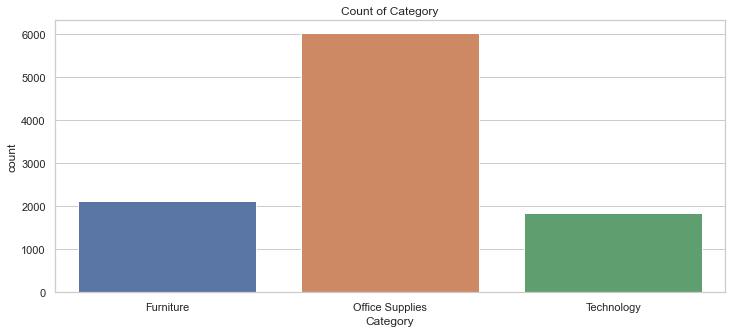

In [55]:
sns.countplot(x='Category', data = df)
plt.title('Count of Category')
plt.show()

As evidenced by the lines of code above:
    
- The category with the best performance is office supplies.
- The second-best performing category is furniture.
- The least performing category is technology.


**TOP TEN BEST PERFORMING CITIES**

In [56]:
city_sales_df = pd.DataFrame(df.groupby(['City'])['DiscountedSales','Quantity','Profit'].mean().
                             sort_values('DiscountedSales',ascending = False))
top10 = city_sales_df[:10]
top10

,DiscountedSales,Quantity,Profit
City,,,
Jamestown,2354.395000,4.500000,642.885750
Cheyenne,1603.136000,4.000000,100.196000
Bellingham,1263.413333,8.000000,203.530267
Independence,1208.685000,3.000000,487.831500
Burbank,1082.386000,4.333333,254.844600
Buffalo,906.349600,4.600000,99.287910
Burlington,866.723280,4.200000,-144.915088
Beverly,861.063333,5.000000,218.306467
Sparks,853.986667,6.333333,76.178667


In [57]:
bottom10 = city_sales_df[-10:]
bottom10

,DiscountedSales,Quantity,Profit
City,,,
Keller,6.000,2.0,2.10000
Loveland,5.241,2.0,1.11945
Layton,4.960,4.0,2.33120
Springdale,4.300,2.0,1.41900
San Luis Obispo,3.620,2.0,1.19460
Ormond Beach,2.808,3.0,-1.96560
Pensacola,2.214,3.0,-1.47600
Jupiter,2.064,1.0,0.15480
Elyria,1.824,1.0,-1.39840


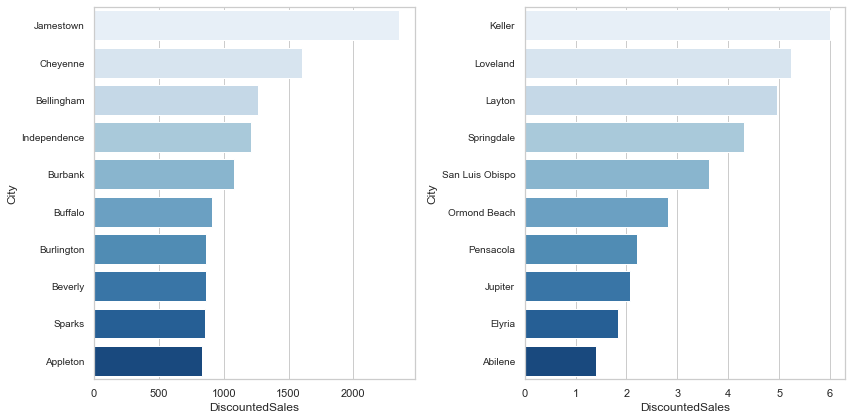

In [58]:
figure, axis = plt.subplots(1,2, figsize=(12, 6))
sns.set_theme(style="whitegrid")

top10c = sns.barplot(data = top10, y = top10.index, x = top10.DiscountedSales, palette = "Blues", ax = axis[0])
#top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.DiscountedSales, palette = "Blues", ax=axis[1])
#bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

**PRODUCT ANALYSIS**

In [59]:
df['SubCategory'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
               ... 
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: SubCategory, Length: 17, dtype: int64

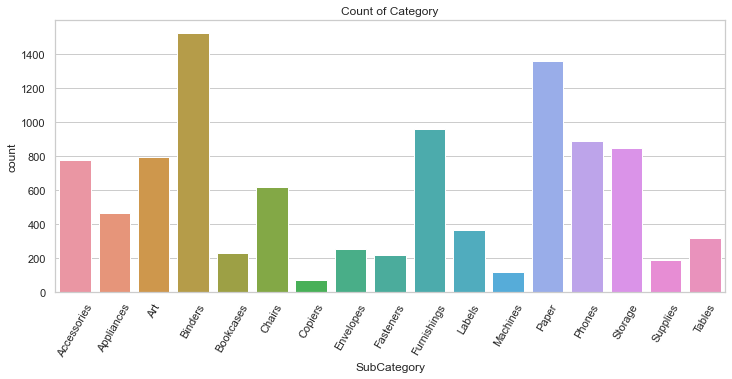

In [60]:
sns.countplot(x='SubCategory', data = df)
sns.set_theme(style="whitegrid")
plt.title('Count of Category')
plt.xticks(rotation = 60)
plt.show()

**BEST PERFORMING PRODUCT**

In [61]:
fur_entr=df[df['Category']=='Furniture']

<AxesSubplot:ylabel='Quantity'>

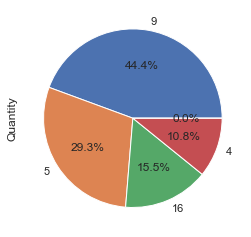

In [67]:
plt.figure(figsize=(4,8))
fur_group.head(5)['Quantity'].plot.pie(autopct="%1.1f%%")

**COUNT OF SUB-CATEGORY REGION-WISE**

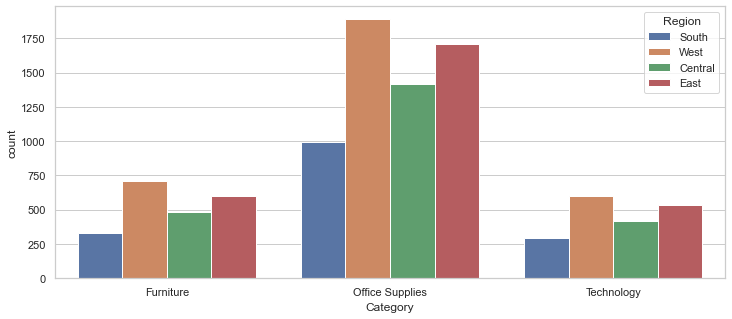

In [68]:
plt.figure(figsize=(12,5))
sns.countplot(x="Category", hue="Region", data=df)
plt.show()

**DISCOUNT COLUMN INSIGHTS**

In [70]:
a = df.pivot_table('Discount', index = 'SubCategory', aggfunc='sum')
a = a.reset_index().sort_values('Discount')
a

,SubCategory,Discount
6,Copiers,11.0
15,Supplies,14.6
8,Fasteners,17.8
7,Envelopes,20.4
10,Labels,25.0
...,...,...
12,Paper,101.8
5,Chairs,104.7
9,Furnishings,132.4
13,Phones,137.4


<AxesSubplot:xlabel='SubCategory'>

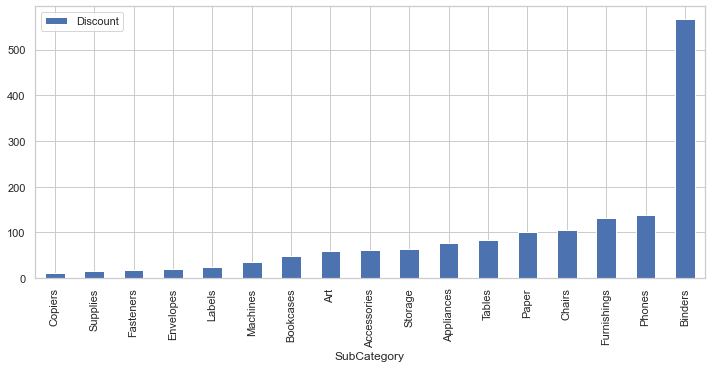

In [71]:
a.plot.bar(x= 'SubCategory')

In [73]:
# Which month does the company records more sales?
month_sales_df = pd.DataFrame(df.groupby(['Ship Mode'])['DiscountedSales', 'Quantity', 'Profit', 'DiscountedAmount']
                              .mean().sort_values('DiscountedSales',ascending = False))
month_sales_df = month_sales_df.reset_index()
month_sales_df = month_sales_df.set_index('Ship Mode')
month_sales_df

,DiscountedSales,Quantity,Profit,DiscountedAmount
Ship Mode,,,,
Same Day,236.755950,3.608856,29.283924,59.367648
Second Class,236.323750,3.817808,29.565956,45.855756
First Class,228.614490,3.702017,31.850134,59.469564
Standard Class,227.928858,3.821327,27.534715,59.428591


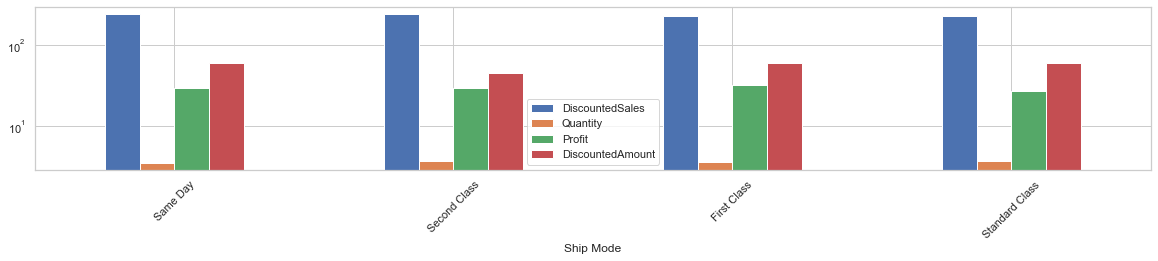

In [74]:
month_sales_df.plot(kind = 'bar', figsize = (20,3))
plt.xticks(rotation = 45)
plt.yscale('log')

In [75]:
tf = df.groupby(['Ship Mode'])['DiscountedSales', 'SubCategory', 'Profit', 'Quantity', 'DiscountedAmount'].sum()
tf.head()

,DiscountedSales,Profit,Quantity,DiscountedAmount
Ship Mode,,,,
First Class,3.513805e+05,48953.6561,5690,91404.7191
Same Day,1.283217e+05,15871.8869,1956,32177.2650
Second Class,4.591770e+05,57446.6516,7418,89097.7346
Standard Class,1.357316e+06,163969.2280,22756,353897.2610


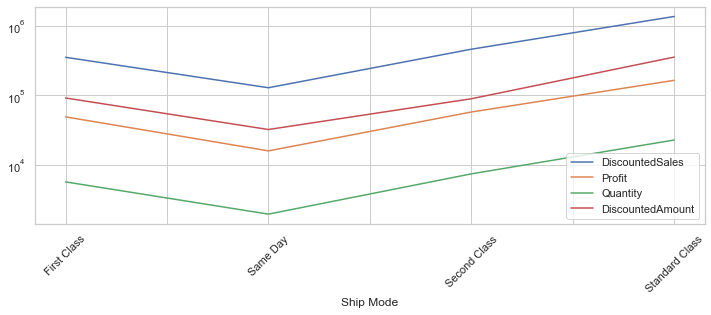

In [76]:
tf.plot(kind = 'line', figsize = (12,4))
plt.xticks(rotation = 45)
plt.yscale('log')

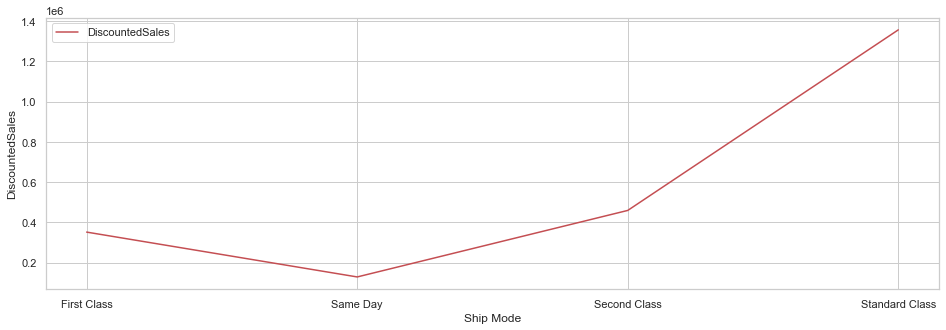

In [77]:
plt.figure(figsize = (16,5))
sns.lineplot('Ship Mode', 'DiscountedSales', data = tf, color = 'r', label= 'DiscountedSales')
plt.legend()

In [78]:
tf = tf.reset_index()
tf

,Ship Mode,DiscountedSales,Profit,Quantity,DiscountedAmount
0,First Class,3.513805e+05,48953.6561,5690,91404.7191
1,Same Day,1.283217e+05,15871.8869,1956,32177.2650
2,Second Class,4.591770e+05,57446.6516,7418,89097.7346
3,Standard Class,1.357316e+06,163969.2280,22756,353897.2610


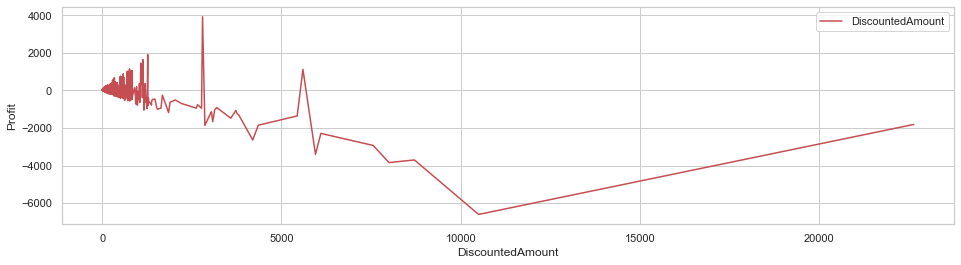

In [79]:
plt.figure(figsize = (16,4))
sns.lineplot('DiscountedAmount', 'Profit', data = df, color = 'r', label= 'DiscountedAmount')
plt.legend()

**WHICH CUSTOMER SEGMENT IS THE MOST PROFITABLE?**

In [80]:
df4 = pd.DataFrame(df.groupby(['Segment'])[['Profit']].mean())
df4

,Profit
Segment,
Consumer,25.855188
Corporate,30.499164
Home Office,33.883643


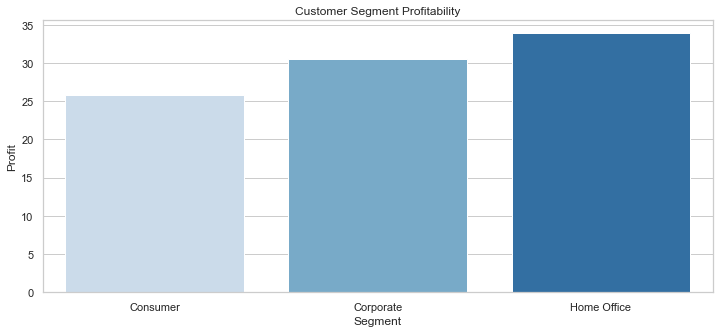

In [81]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.Profit, palette = "Blues")
plt.title("Customer Segment Profitability")
plt.show()

**WHICH IS THE PREFERRED SHIP MODE?**

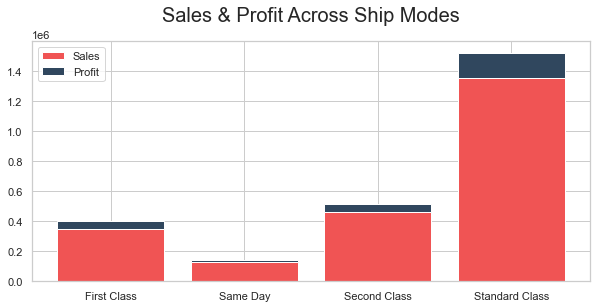

In [82]:
# Taking a subset of data (To keep things simple)
df_stackb = df[['Ship Mode','DiscountedSales','Profit']]
# taking a groupby on category and then ship mode...
df_stackb = df_stackb.groupby(['Ship Mode']).sum().reset_index()
# df_stackb

# Visualizing the Stacked BarChart
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=df_stackb['Ship Mode'], height=df_stackb['DiscountedSales'], color='#F05454')
plt.bar(x=df_stackb['Ship Mode'], height=df_stackb['Profit'], bottom=df_stackb['DiscountedSales'], color='#30475E')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['Sales','Profit'])

#### LOSS ANALYSIS

In [83]:
loss_df = df[df['Profit'] < 0]

In [85]:
loss_with_zero_df = df[(df['Profit'] < 0) & (df['Discount'] == 0)]
loss_with_zero_df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,SubCategory,DiscountedSales,Quantity,Discount,Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%


In [86]:
loss_df.head(2)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,SubCategory,DiscountedSales,Quantity,Discount,Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.031,1741.05,348.21,1340.6085,783.4725,-28.571429
14,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.858,344.05,68.81,192.6680,275.2400,-64.285714


**MONEY LOSS WITHIN THE FOUR YEAR RANGE IN DOLLARS**

In [87]:
Total_loss=np.negative(loss_df['Profit'].sum())
print("Total loss = %.2f" %Total_loss)

Total loss = 156112.99


In [89]:
loss_df['Discount'].mean()

0.480813269127879

In [90]:
loss_df.groupby(by='Segment').mean()

,DiscountedSales,Quantity,Discount,Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%
Segment,,,,,,,,,
Consumer,246.456875,3.640080,0.475334,-84.691636,441.831017,117.509402,331.148512,195.374142,-30.725085
Corporate,237.580134,3.942342,0.488649,-80.686434,427.012955,108.572955,318.266567,189.432821,-31.443247
Home Office,287.360124,3.845659,0.484502,-84.843434,539.733569,129.718971,372.203558,252.373445,-31.033545


In [91]:
loss_df.groupby(by='SubCategory').mean().sort_values('Profit',ascending=True).head(3)

,DiscountedSales,Quantity,Discount,Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%
SubCategory,,,,,,,,,
Machines,1646.733023,3.568182,0.581818,-684.515186,3615.533182,862.994318,2331.248209,1968.800159,-33.002652
Tables,517.135695,3.729064,0.365271,-159.665755,826.544089,221.738424,676.801450,309.408394,-21.883383
Appliances,50.485582,3.507463,0.800000,-128.800615,252.427910,71.368806,179.286197,201.942328,-71.580923


In [92]:
loss_df.groupby(by='City').mean().sort_values('Profit',ascending=True).head(3)

,DiscountedSales,Quantity,Discount,Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%
City,,,,,,,,,
Burlington,3011.2185,4.750,0.5000,-1499.832950,6365.8575,1511.925,4511.051450,3354.639,-31.939195
Concord,2213.6060,7.500,0.3000,-943.303200,3662.3500,315.980,3156.909200,1448.744,-23.011016
Louisville,360.5980,4.375,0.6125,-461.763062,1165.5050,251.690,822.361063,804.907,-42.234025


In [93]:
loss_df.sort_values(['DiscountedSales'],ascending=True).groupby(by='Category').mean()

,DiscountedSales,Quantity,Discount,Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%
Category,,,,,,,,,
Furniture,361.296234,3.716690,0.367237,-85.447476,549.854264,146.327896,446.743710,188.558030,-20.697765
Office Supplies,103.508600,3.866667,0.617401,-63.964996,254.356881,62.748000,167.473596,150.848281,-43.502873
Technology,439.899974,3.553506,0.333579,-142.361322,851.859446,216.231550,582.261296,411.959472,-17.203489


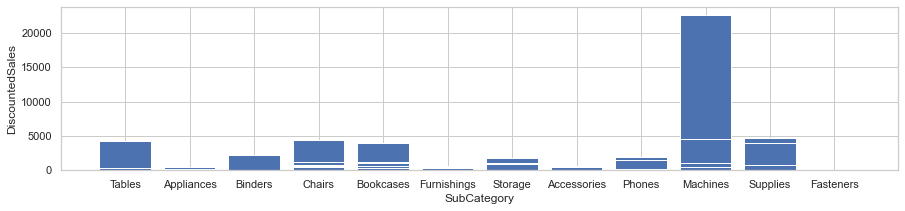

In [94]:
plt.rcParams['figure.figsize']=(15,3)
plt.bar(loss_df['SubCategory'],loss_df['DiscountedSales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('SubCategory');
plt.ylabel('DiscountedSales');

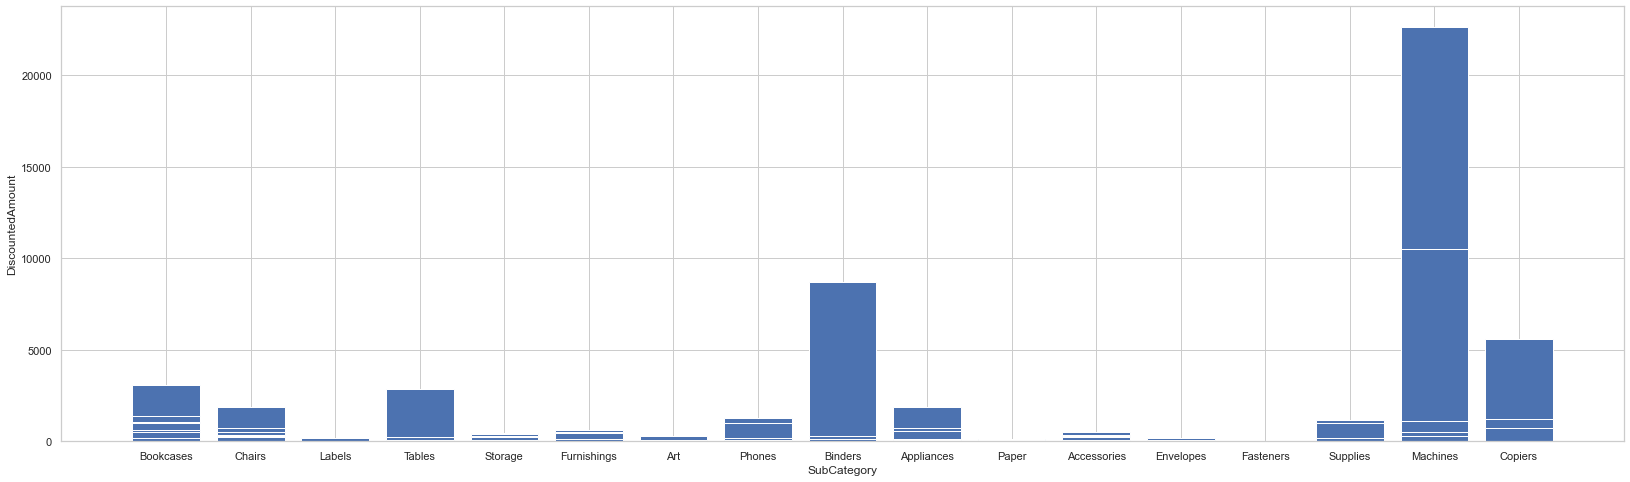

In [95]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['SubCategory'],df['DiscountedAmount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('SubCategory')
plt.ylabel('DiscountedAmount')
plt.show()

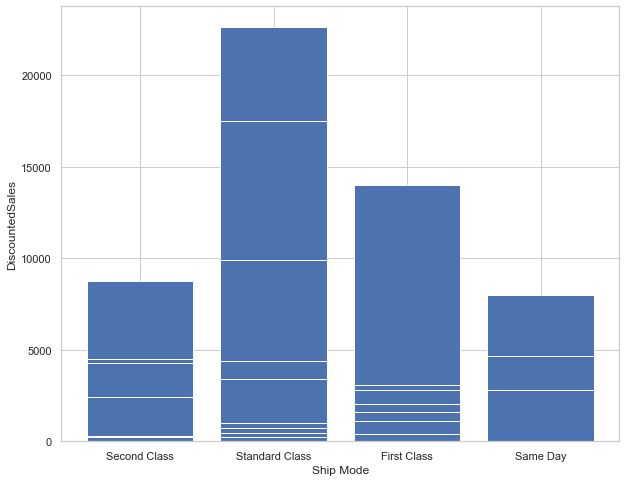

In [96]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df['Ship Mode'],df['DiscountedSales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Ship Mode');
plt.ylabel('DiscountedSales');

**SALES, PROFIT PROPORTIONS ACROSS VARIOUS FEATURES**

**CUSTOMER REGIONAL ANALYSIS**

In [97]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


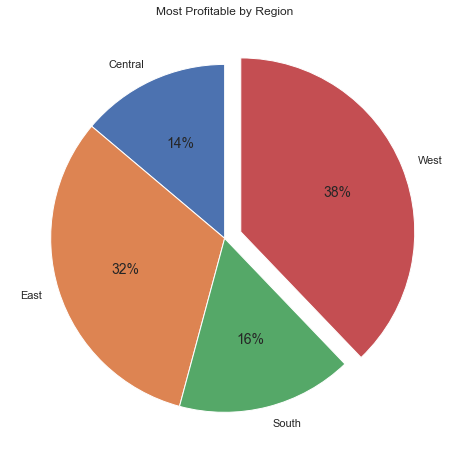

In [98]:
# Plot Pie Chart
plt.pie(region_analysis.Profit, 
        labels = region_analysis.Region, 
        startangle = 90, autopct = "%1.0f%%", 
        explode = [0, 0, 0, 0.1])
plt.title("Most Profitable by Region")
plt.show()

### Recommendations:

- Focus on the Technology subcategory, phones, and chairs as these are the best-selling and most lucrative items. Combine them with things that are less profitable, such bookcases, tables, and chairs, to balance the losses.
- Super Store must think about bundling Bookcases and Tables with High Selling or Profitable Sub-Category Products like Chairs, Copiers, Phones and Office Supplies because selling Bookcases and Tables results in significant losses.
- Create a home office package including items used in workplaces, like a table, seats, phone, copier, storage, label, fasteners, and bookcase, for consumers who may be too busy with work to spend time choosing individual products.
- Take into account removing products like Supplies, Bookcases, and Tables from the catalogue or switching suppliers to negotiate a lower price.
- More than 70% of the client base is made up of the consumer and corporate segments. By launching special specials and packages for mass consumers and home offices and sending promotional emails or flyers, you can target them, especially clients from the East and West area in the Top 10 cities with the Highest Sales.



Discounts are the main cause of loss since certain locations experience loss owing to more discounts while other areas experience fewer sales due to fewer discounts. As a result, it needs to be improved. It is preferable to offer larger discounts during holiday seasons, as this will boost sales. The segment for home offices might use some enhancement. Lack of awareness may be the cause of some cities' lower sales, thus advertising in those areas may increase sales.